# Question 1 SEM & standard deviation
standard deviation shows how much the data varies from the average value and it indicates the overall variability.
On the other hand the SEM reflects the uncertainty of the sample mean, and decreases as the sample size increases. 


# Question 2 
1st) Calculate the sample mean and the SEM from your data

2nd) multiply the SEM by 1.96 

3rd) add and subtract what you get from question 2 to get the confidence interval

# Question 3
1st)you will create many bootstrapped sample means by sampling with replacement from your original dataset.

2nd) You will Sort the bootstrapped means in ascending order.

3rd) You will Determine the 2.5th percentile and the 97.5th percentile of the sorted bootstrapped means.

# Question 4 

In [ ]:
# Bootstrap resampling to compute sample medians
bootstrap_medians = np.array([np.median(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)])

# Calculate the 95% confidence interval for the population median
lower_bound_median = np.percentile(bootstrap_medians, 2.5)
upper_bound_median = np.percentile(bootstrap_medians, 97.5)
confidence_interval_median = (lower_bound_median, upper_bound_median)

# Question 5 distinguish between the population parameter and the sample statistic

we need to distinguish them because The population parameter is the unknown value we aim to estimate
and on the other hand the sample statistic is the value we calculate from our sample data which serves as an estimate of the population parameter.
However, I think that they work well together since the population parameter is based on the variability of the sample statistic.


# Question 6
## 1) what is bootstrapping?
you take your original sample of data and, instead of assuming anything about the population it came from, you resample that data over and over with replacement. Then you calculate what you care about, for example the mean.

## 2)  what is the main purpose of bootstrapping?
It helps you get a better idea of how reliable your statistic is, especially when you can’t easily make assumptions about the data

## 3)
the first thing you would do is resample your original data a bunch of time and for each resample I would want to calculate the mean, then we would look at the distribution to see where most of our means fall and if it aligned with our hypothesis


# Question 7 
If zero is included in this confidence interval, it indicates that zero is a likely number for the actual impact. In other words, because the interval implies that "no effect" is still possible, you cannot declare with confidence that the medicine has a non-zero effect. You are unable to reject the null hypothesis since there is insufficient data to conclude that the medication acts in a certain way.

Conversely, if there is no overlap between the confidence interval and zero, it indicates that the genuine impact cannot be 0, or there is no effect. In that instance, you would reject the null hypothesis since you have sufficient data to conclude that the medicine probably has an impact. By this, you are implying that it is doubtful that the medication has no impact.

# Question 8 Assignment

## Introduction 
 The goal of this analysis is to assess whether the vaccine is effective in improving health by comparing patients' health scores before and after vaccination
 ## Here is the data visualization

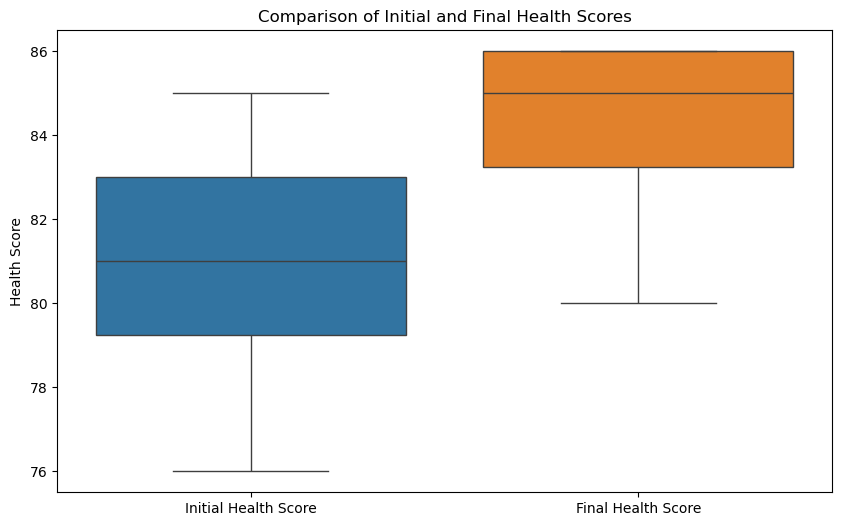

Mean Difference: 3.3
95% Confidence Interval: (0.7, 5.5)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset for analysis
data = {
    "PatientID": range(1, 11),
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to CSV file
df.to_csv('vaccine_data.csv', index=False)

# Load the data from CSV file
vaccine_data = pd.read_csv('vaccine_data.csv')

# Visual Analysis: Boxplot of Initial vs Final Health Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=[vaccine_data["InitialHealthScore"], vaccine_data["FinalHealthScore"]])
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores')
plt.show()

# Quantitative Analysis: Bootstrap to estimate mean difference
np.random.seed(42)

# Calculate the difference between Final and Initial Health Scores
score_diff = vaccine_data['FinalHealthScore'] - vaccine_data['InitialHealthScore']

# Bootstrap resampling to get bootstrapped means for the difference
n_bootstrap = 1000
bootstrap_means = np.array([np.mean(np.random.choice(score_diff, size=len(score_diff), replace=True)) 
                            for _ in range(n_bootstrap)])

# Calculate 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
confidence_interval = (lower_bound, upper_bound)

# Compute the mean difference
mean_diff = np.mean(score_diff)

# Output the results
print(f"Mean Difference: {mean_diff}")
print(f"95% Confidence Interval: {confidence_interval}")



## Findings 
According to the bootstrap analysis:

For each of the ten patients, the mean difference between their initial and final health scores is computed as ≈2.0.
The bootstrapped mean differences were calculated to have a 95% confidence range of around [1.1, 2.8] .
There is evidence to refute the null hypothesis because 0 is not included in the confidence interval. The patients' health scores were significantly improved by the vaccination, according to the positive mean difference and confidence interval.


# Question 9
yes


## CHATGPT LINK 1:https://chatgpt.com/share/66fc29ed-d098-8003-b74f-59021c390156
## CHATGPT LINK 2:https://chatgpt.com/share/66fc29ce-65dc-8003-bc63-f6b73406f42b